 Introduction to ECG
--------------

An electrocardiogram (ECG) is a medical process that measures how the electrical activity of the heart changes with time. As electric potentials are spread through the heart during each cardiac cycle, it shows the electrical differences that occur across the heart because of the depolarization and repolarization of the atrial and ventricular cells. The human heart like other tissues in the human body is surrounded by a conductive ionic fluid, During the cardiac cycle, the heart, as a reaction to potentials moving along its chambers contracts and as it moves, there will be one part of the cardiac tissue that is depolarized and another part that is at rest or polarized, this leads to a charged separation otherwise called a Dipole. The Dipole makes the current flow between the opposite ends of the heart causing an electric field throughout the body, the electric field is detected using electrodes attached to the skin. [1]


The Electrocardiogram is provided by the voltage of the electric field detected through the use of the electrodes attached to the skin. The intensity of the voltage detected depends on the orientation of the electrodes with respect to that of the dipole ends. The amplitude of the signal is proportional to the mass of tissue involved in creating that dipole at any given time.The electrocardiogram is a very important diagnostic tool that measures and records the electrical activity of the heart in detail.


A typical cycle of an ECG signal is made up of several waves. The R wave is the wave with the highest amplitude, an RR interval is the time elapsed between two successive R waves. The waves with the lower amplitudes are the P wave (associated with right and left atrial depolarization), the T wave, and the U wave. RR intervals help to show the variation between consecutive heartbeats. Heart rate variability (HRV) measurements analyze how these RR intervals change over time.

Another feature of an ECG signal is the QRS complex. It is a series of 3 deflections that show the current associated with right and left ventricular depolarization. The first deflection if negative is called a Q wave, the first positive deflection in the complex is called an R wave. A negative deflection after an R wave is called an S wave. A second positive deflection after the S wave, if there is one, is called the R’ wave. Some QRS complexes do not have all three deflections. But irrespective of the number of waves present, they are all QRS complexes [2].
 
The PR interval is the region of the signal that starts at the beginning of the Pwave and stops at the beginning of the QRS complex, this interval measures the time from the initial depolarization of the atria to the initial depolarization of the ventricles while the QT interval The QT Interval is measured from the beginning of the QRS to the end of the T wave. It depicts the time in which the ventricles depolarize and repolarize and is a measure of ventricular action potential (AP) duration.

The U waves are the most neglected of all waves in the ECG signal. They are more prominent in slow heart rates.




# In the section below, the provided ECG signal is Plotted and analysed, The DFT of the signal is also obtained and the heart rate of the signal is calulated, this sections answers Q4-8 of the project 

Q4) The ECG signal is opened and sampled at 750HZ


 The total length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


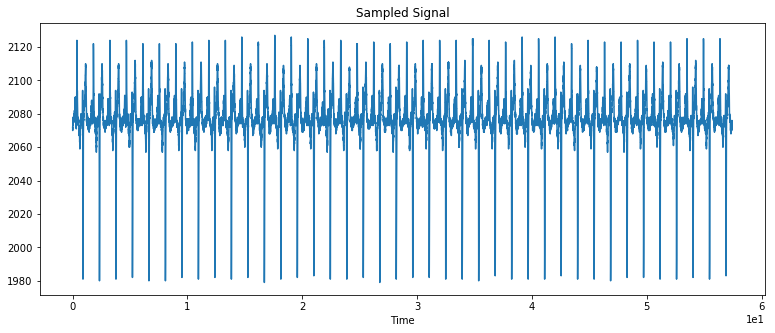

In [1]:
%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division

f = open('aami3a.dat','rb') #The command to open the given ECG file
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The total length of the file is: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 lines'  )
#we will now populate an array for the time which we now is 1/120MHz step for a total of 5500
x=np.arange(0,43081/750.,1/750.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)))

plt.figure (figsize=(13,5))
plt.subplot(111)
plt.plot(x,AllSignal[:43081])
plt.title('Sampled Signal')
plt.xlabel('Time')
plt.ticklabel_format( axis='x', scilimits=(0,0))
f.close()

Q5) Determining the Number of samples for 5 beats of a signal with an average heart rate between 60 and 100 bpm

Average heart rate between 60 and 100 bpm will be 80bpm, this will give and equivalent of 1.33 beats per second
    
    For 5 beats 1.33.*5 = 6.67sec (approx.)
    
    sampling frequency (fs) = 750Hz
    sampling time (Ts) = 1/750HZ = 1.33e-3
    
    Number of samples (Ns) = Total no of beats per sec/ sampling time
    Ns = 6.67/1.33e-3
    Ns= 5000 


Q6) Plotted figure showing 5 cardiac cycles of zoomed in signal

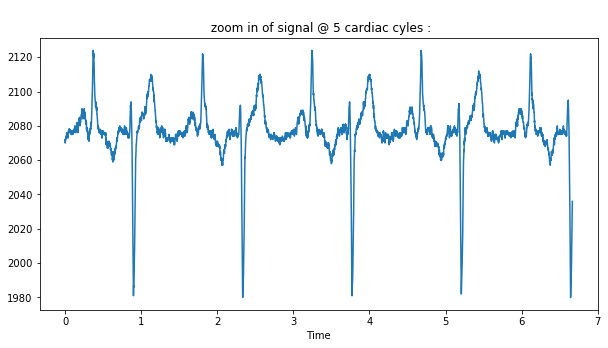

In [2]:
#Question 6 showing the plot for a zoom in of the signal being observed through 5 cycles at a rate of 80bpm

x1=np.arange(0,5000/750.,1/750.) #start,stop,step

plt.figure (figsize=(10,5))
plt.plot(x1,AllSignal[:5000])
plt.title('\n zoom in of signal @ 5 cardiac cyles :')
plt.xlabel('Time')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


Q7) The QRS curve indicates a lower heart rate for the indivial

Q8) The code below shows the estimation of the heart rate of the signal

In [3]:
#First we estimate the peak value of the signal
p=np.amax(AllSignal[:5000])
print ('The Peak value of the signal is '   +str(p))

#Code to calculate heart rate
t=np.arange(21541)
B=0
for index in t:
    if AllSignal[index]>=2124: #peak signal value
        B=B+1
print 'Calculated heart rate= ' +str(B*2) +' bpm'

The Peak value of the signal is 2124
Calculated heart rate= 44 bpm


# This Next section covers questions 9-13 of the assignment, it is concerned with the  DFT analysis of the signal.

Q9) Estimation and Plot of the DFT of the Signal

<IPython.core.display.Javascript object>


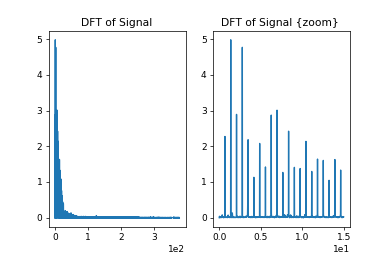

In [11]:
%matplotlib nbagg
from __future__ import division
Sig=AllSignal[:43081]
L2=np.arange(21541)

dataF=Sig-np.mean(Sig) #eliminate dc components of the signal by subtracting mean from the data
L=len(dataF)

f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L #showing normalized positive L/2 frequencies 

plt.subplot(121)
plt.plot(f, PyyClean[:21541]) #half original length
plt.title('DFT of Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>15) #zoom in to 15Hz
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of Signal {zoom} ')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

       


Q10) Estimation of the frequency at maximum of the DFT

In [6]:
p=np.amax(PyyClean[:21541]) #calculating the maximum in the DFT
print 'The maximum in DFT = ' +str(p)
#next, estimate corresponding frequency value at maximum i.e 4.918
for index in L2:
    if PyyClean[index]>=4.9817:
        print 'Frequency at maximum =' +str(index/57.44) + ' Hz'  
        break 

The maximum in DFT = 4.98176674504
Frequency at maximum =1.39275766017 Hz


Q11) Calculation of Heart rate in bpm

The Heart in bpm is estimated by dividing the total time (1min)/frequency observed at the maximum of the spectrum 

    fmax= 1.39HZ
    Heart Rate (HR) = 60/1.39
                HR  = 43.165 bpm

Q12) The peak in the DFT spectrum shows the maximum amplitude of the ECG signal. From this amplitude, we can estimate the corresponding maximum frequency on the x-axis.

Heart rate in beats per minute can be calculated using the equation;         
                            
                                Heart Rate = 60/Fpeak


Q13) The signal did not need to be filtered as it was already very clean, Also applying a filter to an ECG signal can affect the amplitudes of the waves in the signals, accurate readings of the amplitudes are required in order to determine the heart rate. Therefore filtering the signal could be a problem in determining heart rate[3].

# The final section of this Notebook covers Q14-17, a 4th order butterworth filter is applied to the signal to cut frequencies above 100Hz, the frequency response is observed and the DFT of the filtered signal is obtained

Q14) Design and Application of filter to signal

<IPython.core.display.Javascript object>


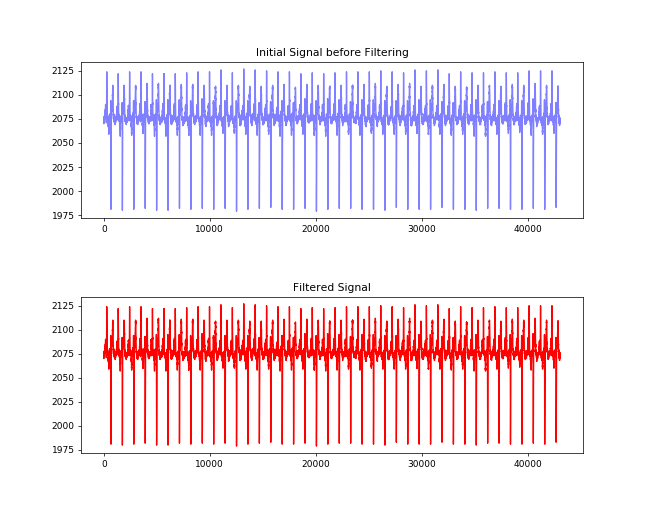

In [16]:
from scipy.signal import butter, lfilter 
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs #setting nyq freq. at 1/2 the sampling freq.
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtered = butter_lowpass_filter(Sig, 100.0, 200.0, 4)#cutoff @100Hz, Fs@200Hz, 4th order filter

plt.figure (figsize=(10,8))
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(Sig, color='Blue', alpha=0.5, label='Initial Signal') #plotting initial signal before filtering for observation
plt.title('Initial Signal before Filtering')
plt.subplot(212)
plt.plot(filtered, color='Red', label='Filtered Signal')
plt.title('Filtered Signal')
plt.show()


Q15) Plotting the frequency response of the filter

<IPython.core.display.Javascript object>


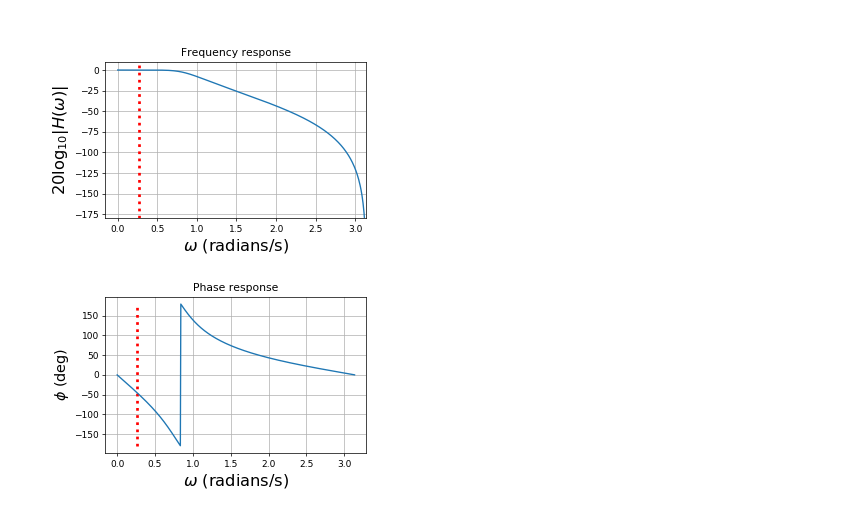

In [13]:
from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((13,8))

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
x=np.arange(0,43081/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[1,0]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()






Q16) Obtained DFT of the signal

<IPython.core.display.Javascript object>


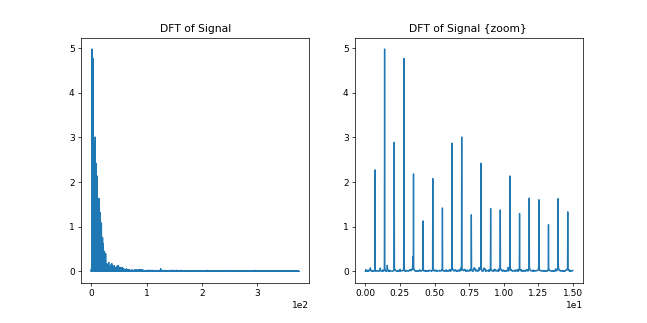

In [14]:
from __future__ import division

LL=len(s)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=np.arange(0,750/2,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL

f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L #showing normalized positive L/2 frequencies 

plt.figure (figsize=(10,5))
plt.subplot(121)
plt.plot(f, PyyClean[:21541])
plt.title('DFT of Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>15)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of Signal {zoom} ')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



Q17) It can be observed that filtering the signal did not have any major effect as the plots for the signal before and after filtering remain the same. I concluded that the given signal did not contain any frequency above the cutoff frequency (100Hz) set when designing the filter.

# References

[1] Dupre, A., Vincent, S., & Iaizzo, P. A. (2005). Basic ECG theory, recordings, and interpretation. In Handbook of cardiac anatomy, physiology, and devices (pp. 191-201). Humana Press.

[2] Hurskyi, A., Matviykiv, O., & Lobur, M. (2017, April). Research of electrocardiography sensors for healthcare monitoring. In Perspective Technologies and Methods in MEMS Design (MEMSTECH), 2017 XIIIth International Conference on (pp. 164-166). IEEE.

[3] Schrope, D. P., Fox, P. R., Hahn, A. W., Bond, B., & Rosenthal, S. (1995). Effects of electrocardiograph frequency filters on P-QRS-T amplitudes of the feline electrocardiogram. American journal of veterinary research, 56(11), 1534-1540.